# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

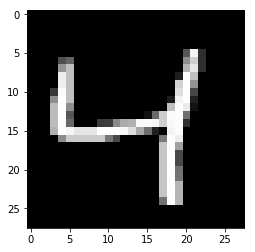

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
# encoding_dim = 32

learning_rate = 0.001
image_size = mnist.train.images.shape[1]
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, image_size], name="inputs")
targets_ = tf.placeholder(tf.float32, [None, image_size], name="targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
h_weights = tf.Variable(tf.random_normal([image_size, image_size]), name="h_weights")
h_bias = tf.Variable(tf.random_normal([image_size]), name="h_bias")

encoded = tf.add(tf.matmul(inputs_, h_weights), h_bias)
encoded = tf.nn.relu(encoded)

# Output layer logits, fully connected layer with no activation
logits = tf.add(tf.matmul(encoded, h_weights), h_bias)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 73.2229
Epoch: 1/20... Training loss: 70.8944
Epoch: 1/20... Training loss: 70.4811
Epoch: 1/20... Training loss: 68.3082
Epoch: 1/20... Training loss: 64.2744
Epoch: 1/20... Training loss: 64.2262
Epoch: 1/20... Training loss: 61.4831
Epoch: 1/20... Training loss: 61.1938
Epoch: 1/20... Training loss: 60.2180
Epoch: 1/20... Training loss: 58.6503
Epoch: 1/20... Training loss: 56.3585
Epoch: 1/20... Training loss: 55.2465
Epoch: 1/20... Training loss: 51.9955
Epoch: 1/20... Training loss: 51.8393
Epoch: 1/20... Training loss: 51.1541
Epoch: 1/20... Training loss: 49.5036
Epoch: 1/20... Training loss: 48.5751
Epoch: 1/20... Training loss: 47.6403
Epoch: 1/20... Training loss: 46.6013
Epoch: 1/20... Training loss: 44.5394
Epoch: 1/20... Training loss: 44.1042
Epoch: 1/20... Training loss: 43.6637
Epoch: 1/20... Training loss: 42.8172
Epoch: 1/20... Training loss: 41.3220
Epoch: 1/20... Training loss: 40.9601
Epoch: 1/20... Training loss: 39.2445
Epoch: 1/20.

Epoch: 1/20... Training loss: 7.1236
Epoch: 1/20... Training loss: 7.3373
Epoch: 1/20... Training loss: 6.7914
Epoch: 1/20... Training loss: 6.8864
Epoch: 1/20... Training loss: 6.6948
Epoch: 1/20... Training loss: 7.0037
Epoch: 1/20... Training loss: 7.0026
Epoch: 1/20... Training loss: 7.0789
Epoch: 1/20... Training loss: 6.6813
Epoch: 1/20... Training loss: 6.8331
Epoch: 1/20... Training loss: 6.6313
Epoch: 1/20... Training loss: 7.2171
Epoch: 1/20... Training loss: 6.5730
Epoch: 1/20... Training loss: 6.4979
Epoch: 1/20... Training loss: 6.6843
Epoch: 1/20... Training loss: 7.1381
Epoch: 1/20... Training loss: 6.6783
Epoch: 1/20... Training loss: 6.7569
Epoch: 1/20... Training loss: 6.5628
Epoch: 1/20... Training loss: 6.6414
Epoch: 1/20... Training loss: 6.6110
Epoch: 1/20... Training loss: 6.6711
Epoch: 1/20... Training loss: 6.7713
Epoch: 1/20... Training loss: 6.4338
Epoch: 1/20... Training loss: 6.5817
Epoch: 1/20... Training loss: 6.4604
Epoch: 1/20... Training loss: 6.5797
E

Epoch: 2/20... Training loss: 4.0887
Epoch: 2/20... Training loss: 4.0946
Epoch: 2/20... Training loss: 3.9367
Epoch: 2/20... Training loss: 4.0455
Epoch: 2/20... Training loss: 3.8806
Epoch: 2/20... Training loss: 3.6705
Epoch: 2/20... Training loss: 3.9005
Epoch: 2/20... Training loss: 3.9797
Epoch: 2/20... Training loss: 3.8816
Epoch: 2/20... Training loss: 4.0031
Epoch: 2/20... Training loss: 3.9681
Epoch: 2/20... Training loss: 3.7984
Epoch: 2/20... Training loss: 3.9818
Epoch: 2/20... Training loss: 3.7871
Epoch: 2/20... Training loss: 3.9623
Epoch: 2/20... Training loss: 3.8505
Epoch: 2/20... Training loss: 3.9773
Epoch: 2/20... Training loss: 3.6227
Epoch: 2/20... Training loss: 3.8679
Epoch: 2/20... Training loss: 3.9926
Epoch: 2/20... Training loss: 3.7245
Epoch: 2/20... Training loss: 3.8989
Epoch: 2/20... Training loss: 3.7319
Epoch: 2/20... Training loss: 4.0445
Epoch: 2/20... Training loss: 3.8654
Epoch: 2/20... Training loss: 3.8805
Epoch: 2/20... Training loss: 3.9653
E

Epoch: 3/20... Training loss: 2.8362
Epoch: 3/20... Training loss: 2.7538
Epoch: 3/20... Training loss: 2.7482
Epoch: 3/20... Training loss: 2.6795
Epoch: 3/20... Training loss: 2.6383
Epoch: 3/20... Training loss: 2.7054
Epoch: 3/20... Training loss: 2.7713
Epoch: 3/20... Training loss: 2.8147
Epoch: 3/20... Training loss: 2.7483
Epoch: 3/20... Training loss: 2.6961
Epoch: 3/20... Training loss: 2.7481
Epoch: 3/20... Training loss: 2.7055
Epoch: 3/20... Training loss: 2.7204
Epoch: 3/20... Training loss: 2.6490
Epoch: 3/20... Training loss: 2.5821
Epoch: 3/20... Training loss: 2.7709
Epoch: 3/20... Training loss: 2.7739
Epoch: 3/20... Training loss: 2.6552
Epoch: 3/20... Training loss: 2.5609
Epoch: 3/20... Training loss: 2.6272
Epoch: 3/20... Training loss: 2.7542
Epoch: 3/20... Training loss: 2.6582
Epoch: 3/20... Training loss: 2.6594
Epoch: 3/20... Training loss: 2.5922
Epoch: 3/20... Training loss: 2.7224
Epoch: 3/20... Training loss: 2.6865
Epoch: 3/20... Training loss: 2.7117
E

Epoch: 4/20... Training loss: 2.0440
Epoch: 4/20... Training loss: 2.2135
Epoch: 4/20... Training loss: 2.0187
Epoch: 4/20... Training loss: 1.9470
Epoch: 4/20... Training loss: 2.0495
Epoch: 4/20... Training loss: 2.1373
Epoch: 4/20... Training loss: 2.0503
Epoch: 4/20... Training loss: 2.0686
Epoch: 4/20... Training loss: 1.9954
Epoch: 4/20... Training loss: 2.0046
Epoch: 4/20... Training loss: 2.0855
Epoch: 4/20... Training loss: 2.1345
Epoch: 4/20... Training loss: 1.9280
Epoch: 4/20... Training loss: 2.0008
Epoch: 4/20... Training loss: 1.9958
Epoch: 4/20... Training loss: 2.0243
Epoch: 4/20... Training loss: 2.0507
Epoch: 4/20... Training loss: 2.0287
Epoch: 4/20... Training loss: 1.9539
Epoch: 4/20... Training loss: 2.0533
Epoch: 4/20... Training loss: 2.0380
Epoch: 4/20... Training loss: 2.0474
Epoch: 4/20... Training loss: 2.0039
Epoch: 4/20... Training loss: 2.0679
Epoch: 4/20... Training loss: 1.9922
Epoch: 4/20... Training loss: 1.9991
Epoch: 4/20... Training loss: 1.9691
E

Epoch: 5/20... Training loss: 1.5790
Epoch: 5/20... Training loss: 1.6106
Epoch: 5/20... Training loss: 1.6237
Epoch: 5/20... Training loss: 1.6172
Epoch: 5/20... Training loss: 1.4391
Epoch: 5/20... Training loss: 1.6120
Epoch: 5/20... Training loss: 1.5058
Epoch: 5/20... Training loss: 1.5838
Epoch: 5/20... Training loss: 1.5666
Epoch: 5/20... Training loss: 1.5340
Epoch: 5/20... Training loss: 1.5624
Epoch: 5/20... Training loss: 1.5682
Epoch: 5/20... Training loss: 1.6177
Epoch: 5/20... Training loss: 1.5110
Epoch: 5/20... Training loss: 1.5679
Epoch: 5/20... Training loss: 1.5164
Epoch: 5/20... Training loss: 1.4640
Epoch: 5/20... Training loss: 1.5447
Epoch: 5/20... Training loss: 1.5264
Epoch: 5/20... Training loss: 1.5304
Epoch: 5/20... Training loss: 1.5121
Epoch: 5/20... Training loss: 1.4748
Epoch: 5/20... Training loss: 1.4814
Epoch: 5/20... Training loss: 1.5644
Epoch: 5/20... Training loss: 1.5185
Epoch: 5/20... Training loss: 1.5459
Epoch: 5/20... Training loss: 1.5273
E

Epoch: 6/20... Training loss: 1.1364
Epoch: 6/20... Training loss: 1.1525
Epoch: 6/20... Training loss: 1.1483
Epoch: 6/20... Training loss: 1.1412
Epoch: 6/20... Training loss: 1.1405
Epoch: 6/20... Training loss: 1.1088
Epoch: 6/20... Training loss: 1.1572
Epoch: 6/20... Training loss: 1.1678
Epoch: 6/20... Training loss: 1.1964
Epoch: 6/20... Training loss: 1.1700
Epoch: 6/20... Training loss: 1.1023
Epoch: 6/20... Training loss: 1.1440
Epoch: 6/20... Training loss: 1.1606
Epoch: 6/20... Training loss: 1.1561
Epoch: 6/20... Training loss: 1.1352
Epoch: 6/20... Training loss: 1.1779
Epoch: 6/20... Training loss: 1.1505
Epoch: 6/20... Training loss: 1.1123
Epoch: 6/20... Training loss: 1.0926
Epoch: 6/20... Training loss: 1.1837
Epoch: 6/20... Training loss: 1.1602
Epoch: 6/20... Training loss: 1.1655
Epoch: 6/20... Training loss: 1.1287
Epoch: 6/20... Training loss: 1.0659
Epoch: 6/20... Training loss: 1.2010
Epoch: 6/20... Training loss: 1.1973
Epoch: 6/20... Training loss: 1.1163
E

Epoch: 6/20... Training loss: 0.8381
Epoch: 6/20... Training loss: 0.8328
Epoch: 6/20... Training loss: 0.8760
Epoch: 6/20... Training loss: 0.8595
Epoch: 6/20... Training loss: 0.8479
Epoch: 6/20... Training loss: 0.8424
Epoch: 6/20... Training loss: 0.7948
Epoch: 6/20... Training loss: 0.7865
Epoch: 6/20... Training loss: 0.8189
Epoch: 6/20... Training loss: 0.8402
Epoch: 6/20... Training loss: 0.8475
Epoch: 6/20... Training loss: 0.7873
Epoch: 6/20... Training loss: 0.8179
Epoch: 6/20... Training loss: 0.8286
Epoch: 6/20... Training loss: 0.8278
Epoch: 6/20... Training loss: 0.8492
Epoch: 6/20... Training loss: 0.8318
Epoch: 6/20... Training loss: 0.8275
Epoch: 6/20... Training loss: 0.8185
Epoch: 6/20... Training loss: 0.8290
Epoch: 6/20... Training loss: 0.8258
Epoch: 6/20... Training loss: 0.8232
Epoch: 6/20... Training loss: 0.7937
Epoch: 6/20... Training loss: 0.8164
Epoch: 6/20... Training loss: 0.7972
Epoch: 6/20... Training loss: 0.8147
Epoch: 6/20... Training loss: 0.8097
E

Epoch: 7/20... Training loss: 0.6012
Epoch: 7/20... Training loss: 0.5278
Epoch: 7/20... Training loss: 0.5590
Epoch: 7/20... Training loss: 0.5832
Epoch: 7/20... Training loss: 0.5559
Epoch: 7/20... Training loss: 0.5523
Epoch: 7/20... Training loss: 0.5791
Epoch: 7/20... Training loss: 0.5894
Epoch: 7/20... Training loss: 0.5586
Epoch: 7/20... Training loss: 0.5889
Epoch: 7/20... Training loss: 0.5768
Epoch: 7/20... Training loss: 0.5490
Epoch: 7/20... Training loss: 0.5729
Epoch: 7/20... Training loss: 0.5688
Epoch: 7/20... Training loss: 0.5664
Epoch: 7/20... Training loss: 0.5569
Epoch: 7/20... Training loss: 0.5706
Epoch: 7/20... Training loss: 0.5503
Epoch: 7/20... Training loss: 0.5900
Epoch: 7/20... Training loss: 0.5554
Epoch: 7/20... Training loss: 0.5532
Epoch: 7/20... Training loss: 0.5498
Epoch: 7/20... Training loss: 0.5400
Epoch: 7/20... Training loss: 0.5281
Epoch: 7/20... Training loss: 0.5895
Epoch: 7/20... Training loss: 0.5406
Epoch: 7/20... Training loss: 0.5868
E

Epoch: 8/20... Training loss: 0.3994
Epoch: 8/20... Training loss: 0.4411
Epoch: 8/20... Training loss: 0.4072
Epoch: 8/20... Training loss: 0.4178
Epoch: 8/20... Training loss: 0.4157
Epoch: 8/20... Training loss: 0.4097
Epoch: 8/20... Training loss: 0.4301
Epoch: 8/20... Training loss: 0.4043
Epoch: 8/20... Training loss: 0.4339
Epoch: 8/20... Training loss: 0.4170
Epoch: 8/20... Training loss: 0.4372
Epoch: 8/20... Training loss: 0.4072
Epoch: 8/20... Training loss: 0.4249
Epoch: 8/20... Training loss: 0.4333
Epoch: 8/20... Training loss: 0.4070
Epoch: 8/20... Training loss: 0.4221
Epoch: 8/20... Training loss: 0.4124
Epoch: 8/20... Training loss: 0.3956
Epoch: 8/20... Training loss: 0.4096
Epoch: 8/20... Training loss: 0.4230
Epoch: 8/20... Training loss: 0.4114
Epoch: 8/20... Training loss: 0.4163
Epoch: 8/20... Training loss: 0.4363
Epoch: 8/20... Training loss: 0.4089
Epoch: 8/20... Training loss: 0.3958
Epoch: 8/20... Training loss: 0.4054
Epoch: 8/20... Training loss: 0.4169
E

Epoch: 9/20... Training loss: 0.3488
Epoch: 9/20... Training loss: 0.3146
Epoch: 9/20... Training loss: 0.3264
Epoch: 9/20... Training loss: 0.3539
Epoch: 9/20... Training loss: 0.3365
Epoch: 9/20... Training loss: 0.3421
Epoch: 9/20... Training loss: 0.3288
Epoch: 9/20... Training loss: 0.3547
Epoch: 9/20... Training loss: 0.3392
Epoch: 9/20... Training loss: 0.3407
Epoch: 9/20... Training loss: 0.3240
Epoch: 9/20... Training loss: 0.3374
Epoch: 9/20... Training loss: 0.3509
Epoch: 9/20... Training loss: 0.3663
Epoch: 9/20... Training loss: 0.3190
Epoch: 9/20... Training loss: 0.3313
Epoch: 9/20... Training loss: 0.3304
Epoch: 9/20... Training loss: 0.3451
Epoch: 9/20... Training loss: 0.3580
Epoch: 9/20... Training loss: 0.3557
Epoch: 9/20... Training loss: 0.3430
Epoch: 9/20... Training loss: 0.3419
Epoch: 9/20... Training loss: 0.3244
Epoch: 9/20... Training loss: 0.3216
Epoch: 9/20... Training loss: 0.3276
Epoch: 9/20... Training loss: 0.3403
Epoch: 9/20... Training loss: 0.3283
E

Epoch: 10/20... Training loss: 0.3087
Epoch: 10/20... Training loss: 0.2967
Epoch: 10/20... Training loss: 0.3001
Epoch: 10/20... Training loss: 0.2905
Epoch: 10/20... Training loss: 0.2987
Epoch: 10/20... Training loss: 0.3021
Epoch: 10/20... Training loss: 0.3056
Epoch: 10/20... Training loss: 0.3053
Epoch: 10/20... Training loss: 0.3032
Epoch: 10/20... Training loss: 0.3120
Epoch: 10/20... Training loss: 0.3006
Epoch: 10/20... Training loss: 0.2839
Epoch: 10/20... Training loss: 0.2897
Epoch: 10/20... Training loss: 0.3036
Epoch: 10/20... Training loss: 0.3013
Epoch: 10/20... Training loss: 0.3096
Epoch: 10/20... Training loss: 0.2954
Epoch: 10/20... Training loss: 0.3170
Epoch: 10/20... Training loss: 0.3113
Epoch: 10/20... Training loss: 0.3108
Epoch: 10/20... Training loss: 0.2963
Epoch: 10/20... Training loss: 0.2997
Epoch: 10/20... Training loss: 0.3015
Epoch: 10/20... Training loss: 0.2953
Epoch: 10/20... Training loss: 0.2983
Epoch: 10/20... Training loss: 0.3080
Epoch: 10/20

Epoch: 10/20... Training loss: 0.2772
Epoch: 10/20... Training loss: 0.2888
Epoch: 10/20... Training loss: 0.2838
Epoch: 10/20... Training loss: 0.2903
Epoch: 10/20... Training loss: 0.2835
Epoch: 10/20... Training loss: 0.2924
Epoch: 10/20... Training loss: 0.2760
Epoch: 10/20... Training loss: 0.2757
Epoch: 10/20... Training loss: 0.2808
Epoch: 10/20... Training loss: 0.2771
Epoch: 10/20... Training loss: 0.2790
Epoch: 10/20... Training loss: 0.2789
Epoch: 10/20... Training loss: 0.2942
Epoch: 10/20... Training loss: 0.2927
Epoch: 10/20... Training loss: 0.2806
Epoch: 10/20... Training loss: 0.2735
Epoch: 10/20... Training loss: 0.2730
Epoch: 10/20... Training loss: 0.2827
Epoch: 10/20... Training loss: 0.2842
Epoch: 10/20... Training loss: 0.2742
Epoch: 10/20... Training loss: 0.2846
Epoch: 10/20... Training loss: 0.2667
Epoch: 10/20... Training loss: 0.2734
Epoch: 11/20... Training loss: 0.2658
Epoch: 11/20... Training loss: 0.2797
Epoch: 11/20... Training loss: 0.2754
Epoch: 11/20

Epoch: 11/20... Training loss: 0.2577
Epoch: 11/20... Training loss: 0.2538
Epoch: 11/20... Training loss: 0.2667
Epoch: 11/20... Training loss: 0.2705
Epoch: 11/20... Training loss: 0.2639
Epoch: 11/20... Training loss: 0.2618
Epoch: 11/20... Training loss: 0.2685
Epoch: 11/20... Training loss: 0.2556
Epoch: 11/20... Training loss: 0.2614
Epoch: 11/20... Training loss: 0.2554
Epoch: 11/20... Training loss: 0.2565
Epoch: 11/20... Training loss: 0.2616
Epoch: 11/20... Training loss: 0.2679
Epoch: 11/20... Training loss: 0.2645
Epoch: 11/20... Training loss: 0.2492
Epoch: 11/20... Training loss: 0.2623
Epoch: 11/20... Training loss: 0.2535
Epoch: 11/20... Training loss: 0.2430
Epoch: 11/20... Training loss: 0.2577
Epoch: 11/20... Training loss: 0.2538
Epoch: 11/20... Training loss: 0.2591
Epoch: 11/20... Training loss: 0.2585
Epoch: 11/20... Training loss: 0.2569
Epoch: 11/20... Training loss: 0.2663
Epoch: 11/20... Training loss: 0.2635
Epoch: 11/20... Training loss: 0.2540
Epoch: 11/20

Epoch: 12/20... Training loss: 0.2441
Epoch: 12/20... Training loss: 0.2553
Epoch: 12/20... Training loss: 0.2488
Epoch: 12/20... Training loss: 0.2444
Epoch: 12/20... Training loss: 0.2476
Epoch: 12/20... Training loss: 0.2486
Epoch: 12/20... Training loss: 0.2495
Epoch: 12/20... Training loss: 0.2351
Epoch: 12/20... Training loss: 0.2457
Epoch: 12/20... Training loss: 0.2527
Epoch: 12/20... Training loss: 0.2572
Epoch: 12/20... Training loss: 0.2435
Epoch: 12/20... Training loss: 0.2554
Epoch: 12/20... Training loss: 0.2532
Epoch: 12/20... Training loss: 0.2519
Epoch: 12/20... Training loss: 0.2469
Epoch: 12/20... Training loss: 0.2486
Epoch: 12/20... Training loss: 0.2587
Epoch: 12/20... Training loss: 0.2418
Epoch: 12/20... Training loss: 0.2505
Epoch: 12/20... Training loss: 0.2459
Epoch: 12/20... Training loss: 0.2597
Epoch: 12/20... Training loss: 0.2406
Epoch: 12/20... Training loss: 0.2367
Epoch: 12/20... Training loss: 0.2371
Epoch: 12/20... Training loss: 0.2520
Epoch: 12/20

Epoch: 13/20... Training loss: 0.2270
Epoch: 13/20... Training loss: 0.2335
Epoch: 13/20... Training loss: 0.2321
Epoch: 13/20... Training loss: 0.2313
Epoch: 13/20... Training loss: 0.2309
Epoch: 13/20... Training loss: 0.2430
Epoch: 13/20... Training loss: 0.2417
Epoch: 13/20... Training loss: 0.2347
Epoch: 13/20... Training loss: 0.2289
Epoch: 13/20... Training loss: 0.2334
Epoch: 13/20... Training loss: 0.2316
Epoch: 13/20... Training loss: 0.2392
Epoch: 13/20... Training loss: 0.2392
Epoch: 13/20... Training loss: 0.2273
Epoch: 13/20... Training loss: 0.2297
Epoch: 13/20... Training loss: 0.2388
Epoch: 13/20... Training loss: 0.2405
Epoch: 13/20... Training loss: 0.2365
Epoch: 13/20... Training loss: 0.2287
Epoch: 13/20... Training loss: 0.2416
Epoch: 13/20... Training loss: 0.2414
Epoch: 13/20... Training loss: 0.2388
Epoch: 13/20... Training loss: 0.2342
Epoch: 13/20... Training loss: 0.2423
Epoch: 13/20... Training loss: 0.2325
Epoch: 13/20... Training loss: 0.2312
Epoch: 13/20

Epoch: 14/20... Training loss: 0.2309
Epoch: 14/20... Training loss: 0.2380
Epoch: 14/20... Training loss: 0.2258
Epoch: 14/20... Training loss: 0.2274
Epoch: 14/20... Training loss: 0.2262
Epoch: 14/20... Training loss: 0.2333
Epoch: 14/20... Training loss: 0.2284
Epoch: 14/20... Training loss: 0.2329
Epoch: 14/20... Training loss: 0.2320
Epoch: 14/20... Training loss: 0.2221
Epoch: 14/20... Training loss: 0.2256
Epoch: 14/20... Training loss: 0.2276
Epoch: 14/20... Training loss: 0.2358
Epoch: 14/20... Training loss: 0.2280
Epoch: 14/20... Training loss: 0.2402
Epoch: 14/20... Training loss: 0.2221
Epoch: 14/20... Training loss: 0.2265
Epoch: 14/20... Training loss: 0.2209
Epoch: 14/20... Training loss: 0.2272
Epoch: 14/20... Training loss: 0.2211
Epoch: 14/20... Training loss: 0.2197
Epoch: 14/20... Training loss: 0.2370
Epoch: 14/20... Training loss: 0.2326
Epoch: 14/20... Training loss: 0.2367
Epoch: 14/20... Training loss: 0.2265
Epoch: 14/20... Training loss: 0.2356
Epoch: 14/20

Epoch: 14/20... Training loss: 0.2198
Epoch: 14/20... Training loss: 0.2248
Epoch: 14/20... Training loss: 0.2179
Epoch: 14/20... Training loss: 0.2239
Epoch: 14/20... Training loss: 0.2186
Epoch: 14/20... Training loss: 0.2191
Epoch: 14/20... Training loss: 0.2250
Epoch: 14/20... Training loss: 0.2161
Epoch: 14/20... Training loss: 0.2269
Epoch: 14/20... Training loss: 0.2205
Epoch: 14/20... Training loss: 0.2214
Epoch: 14/20... Training loss: 0.2220
Epoch: 14/20... Training loss: 0.2325
Epoch: 14/20... Training loss: 0.2255
Epoch: 14/20... Training loss: 0.2186
Epoch: 14/20... Training loss: 0.2241
Epoch: 14/20... Training loss: 0.2308
Epoch: 14/20... Training loss: 0.2136
Epoch: 14/20... Training loss: 0.2185
Epoch: 14/20... Training loss: 0.2332
Epoch: 14/20... Training loss: 0.2064
Epoch: 14/20... Training loss: 0.2212
Epoch: 14/20... Training loss: 0.2314
Epoch: 14/20... Training loss: 0.2196
Epoch: 14/20... Training loss: 0.2273
Epoch: 14/20... Training loss: 0.2288
Epoch: 14/20

Epoch: 15/20... Training loss: 0.2164
Epoch: 15/20... Training loss: 0.2248
Epoch: 15/20... Training loss: 0.2204
Epoch: 15/20... Training loss: 0.2142
Epoch: 15/20... Training loss: 0.2168
Epoch: 15/20... Training loss: 0.2144
Epoch: 15/20... Training loss: 0.2231
Epoch: 15/20... Training loss: 0.2152
Epoch: 15/20... Training loss: 0.2162
Epoch: 15/20... Training loss: 0.2182
Epoch: 15/20... Training loss: 0.2222
Epoch: 15/20... Training loss: 0.2207
Epoch: 15/20... Training loss: 0.2198
Epoch: 15/20... Training loss: 0.2177
Epoch: 15/20... Training loss: 0.2168
Epoch: 15/20... Training loss: 0.2148
Epoch: 15/20... Training loss: 0.2211
Epoch: 15/20... Training loss: 0.2158
Epoch: 15/20... Training loss: 0.2117
Epoch: 15/20... Training loss: 0.2166
Epoch: 15/20... Training loss: 0.2184
Epoch: 15/20... Training loss: 0.2191
Epoch: 15/20... Training loss: 0.2167
Epoch: 15/20... Training loss: 0.2094
Epoch: 15/20... Training loss: 0.2158
Epoch: 15/20... Training loss: 0.2199
Epoch: 15/20

Epoch: 16/20... Training loss: 0.2212
Epoch: 16/20... Training loss: 0.2113
Epoch: 16/20... Training loss: 0.2219
Epoch: 16/20... Training loss: 0.2076
Epoch: 16/20... Training loss: 0.2170
Epoch: 16/20... Training loss: 0.2061
Epoch: 16/20... Training loss: 0.2092
Epoch: 16/20... Training loss: 0.2079
Epoch: 16/20... Training loss: 0.2151
Epoch: 16/20... Training loss: 0.2135
Epoch: 16/20... Training loss: 0.2111
Epoch: 16/20... Training loss: 0.2130
Epoch: 16/20... Training loss: 0.2116
Epoch: 16/20... Training loss: 0.2097
Epoch: 16/20... Training loss: 0.2076
Epoch: 16/20... Training loss: 0.2160
Epoch: 16/20... Training loss: 0.2120
Epoch: 16/20... Training loss: 0.2022
Epoch: 16/20... Training loss: 0.2124
Epoch: 16/20... Training loss: 0.2194
Epoch: 16/20... Training loss: 0.2193
Epoch: 16/20... Training loss: 0.2210
Epoch: 16/20... Training loss: 0.2048
Epoch: 16/20... Training loss: 0.2138
Epoch: 16/20... Training loss: 0.2142
Epoch: 16/20... Training loss: 0.2120
Epoch: 16/20

Epoch: 17/20... Training loss: 0.2024
Epoch: 17/20... Training loss: 0.2122
Epoch: 17/20... Training loss: 0.2136
Epoch: 17/20... Training loss: 0.2028
Epoch: 17/20... Training loss: 0.2053
Epoch: 17/20... Training loss: 0.2077
Epoch: 17/20... Training loss: 0.2074
Epoch: 17/20... Training loss: 0.2041
Epoch: 17/20... Training loss: 0.2024
Epoch: 17/20... Training loss: 0.2094
Epoch: 17/20... Training loss: 0.2052
Epoch: 17/20... Training loss: 0.1981
Epoch: 17/20... Training loss: 0.2069
Epoch: 17/20... Training loss: 0.2082
Epoch: 17/20... Training loss: 0.2056
Epoch: 17/20... Training loss: 0.2131
Epoch: 17/20... Training loss: 0.2134
Epoch: 17/20... Training loss: 0.2073
Epoch: 17/20... Training loss: 0.1990
Epoch: 17/20... Training loss: 0.2039
Epoch: 17/20... Training loss: 0.2089
Epoch: 17/20... Training loss: 0.2131
Epoch: 17/20... Training loss: 0.2051
Epoch: 17/20... Training loss: 0.2093
Epoch: 17/20... Training loss: 0.2055
Epoch: 17/20... Training loss: 0.2162
Epoch: 17/20

Epoch: 18/20... Training loss: 0.2029
Epoch: 18/20... Training loss: 0.2111
Epoch: 18/20... Training loss: 0.2042
Epoch: 18/20... Training loss: 0.2076
Epoch: 18/20... Training loss: 0.2079
Epoch: 18/20... Training loss: 0.1997
Epoch: 18/20... Training loss: 0.2020
Epoch: 18/20... Training loss: 0.2021
Epoch: 18/20... Training loss: 0.2038
Epoch: 18/20... Training loss: 0.1991
Epoch: 18/20... Training loss: 0.1978
Epoch: 18/20... Training loss: 0.1977
Epoch: 18/20... Training loss: 0.1987
Epoch: 18/20... Training loss: 0.2056
Epoch: 18/20... Training loss: 0.1938
Epoch: 18/20... Training loss: 0.2046
Epoch: 18/20... Training loss: 0.2116
Epoch: 18/20... Training loss: 0.2098
Epoch: 18/20... Training loss: 0.2032
Epoch: 18/20... Training loss: 0.2053
Epoch: 18/20... Training loss: 0.1965
Epoch: 18/20... Training loss: 0.1994
Epoch: 18/20... Training loss: 0.2022
Epoch: 18/20... Training loss: 0.2111
Epoch: 18/20... Training loss: 0.2091
Epoch: 18/20... Training loss: 0.2038
Epoch: 18/20

Epoch: 18/20... Training loss: 0.1987
Epoch: 18/20... Training loss: 0.2015
Epoch: 18/20... Training loss: 0.2006
Epoch: 18/20... Training loss: 0.1886
Epoch: 18/20... Training loss: 0.1940
Epoch: 18/20... Training loss: 0.2052
Epoch: 18/20... Training loss: 0.1964
Epoch: 18/20... Training loss: 0.2004
Epoch: 18/20... Training loss: 0.2006
Epoch: 18/20... Training loss: 0.1972
Epoch: 18/20... Training loss: 0.2022
Epoch: 18/20... Training loss: 0.2005
Epoch: 18/20... Training loss: 0.1970
Epoch: 18/20... Training loss: 0.2037
Epoch: 18/20... Training loss: 0.1965
Epoch: 18/20... Training loss: 0.1980
Epoch: 18/20... Training loss: 0.1957
Epoch: 18/20... Training loss: 0.1936
Epoch: 18/20... Training loss: 0.2001
Epoch: 18/20... Training loss: 0.1934
Epoch: 18/20... Training loss: 0.2019
Epoch: 18/20... Training loss: 0.1961
Epoch: 18/20... Training loss: 0.2002
Epoch: 18/20... Training loss: 0.1970
Epoch: 18/20... Training loss: 0.2062
Epoch: 18/20... Training loss: 0.1978
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1916
Epoch: 19/20... Training loss: 0.1918
Epoch: 19/20... Training loss: 0.2075
Epoch: 19/20... Training loss: 0.1937
Epoch: 19/20... Training loss: 0.1991
Epoch: 19/20... Training loss: 0.1931
Epoch: 19/20... Training loss: 0.1964
Epoch: 19/20... Training loss: 0.1939
Epoch: 19/20... Training loss: 0.1972
Epoch: 19/20... Training loss: 0.1985
Epoch: 19/20... Training loss: 0.1987
Epoch: 19/20... Training loss: 0.1839
Epoch: 19/20... Training loss: 0.1948
Epoch: 19/20... Training loss: 0.1910
Epoch: 19/20... Training loss: 0.1956
Epoch: 19/20... Training loss: 0.1944
Epoch: 19/20... Training loss: 0.1951
Epoch: 19/20... Training loss: 0.1903
Epoch: 19/20... Training loss: 0.1883
Epoch: 19/20... Training loss: 0.1890
Epoch: 19/20... Training loss: 0.2037
Epoch: 19/20... Training loss: 0.1951
Epoch: 19/20... Training loss: 0.1951
Epoch: 19/20... Training loss: 0.1895
Epoch: 19/20... Training loss: 0.1977
Epoch: 19/20... Training loss: 0.1973
Epoch: 19/20

Epoch: 20/20... Training loss: 0.2021
Epoch: 20/20... Training loss: 0.1892
Epoch: 20/20... Training loss: 0.1914
Epoch: 20/20... Training loss: 0.1888
Epoch: 20/20... Training loss: 0.1913
Epoch: 20/20... Training loss: 0.1983
Epoch: 20/20... Training loss: 0.1924
Epoch: 20/20... Training loss: 0.1932
Epoch: 20/20... Training loss: 0.1946
Epoch: 20/20... Training loss: 0.1987
Epoch: 20/20... Training loss: 0.1946
Epoch: 20/20... Training loss: 0.1987
Epoch: 20/20... Training loss: 0.1923
Epoch: 20/20... Training loss: 0.2007
Epoch: 20/20... Training loss: 0.1919
Epoch: 20/20... Training loss: 0.1862
Epoch: 20/20... Training loss: 0.1915
Epoch: 20/20... Training loss: 0.1869
Epoch: 20/20... Training loss: 0.1862
Epoch: 20/20... Training loss: 0.1836
Epoch: 20/20... Training loss: 0.1863
Epoch: 20/20... Training loss: 0.1861
Epoch: 20/20... Training loss: 0.1924
Epoch: 20/20... Training loss: 0.1906
Epoch: 20/20... Training loss: 0.1922
Epoch: 20/20... Training loss: 0.1927
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

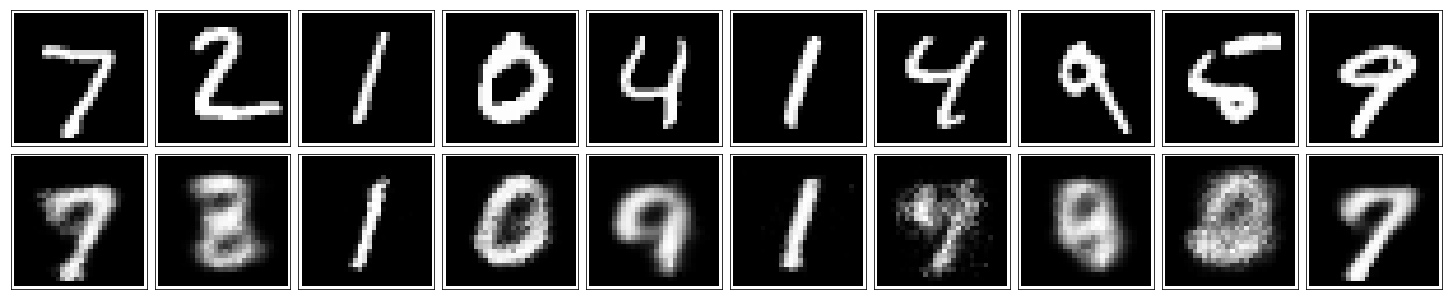

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.